# Regressão logística

Estimar a probabilidade de um perquisador possuir uma filiação internacional, com base nas seguintes variáveis disponíveis:

* DuracaoDoutorado
* Genero 
* Publicacoes 
* IdadeAcademica 
* ExclusividadeDoutorado

In [5]:
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [3]:
import pandas as pd

dataset_path = 'dataset_filiacoes.csv'
dataset = pd.read_csv(dataset_path)
dataset.head()

,IDLattes,DuracaoDoutorado,Genero,ExclusividadeDoutorado,Publicacoes,IdadeAcademica,HistoricoFiliacaoemIESInternacional
0,3317736532048248,4.0,0.0,0,2,3.0,0
1,3317763390163110,5.0,0.0,1,43,21.0,0
2,3317779428214532,3.0,1.0,1,31,16.0,0
3,3317807243271215,4.0,0.0,1,12,9.0,0
4,3317808443296961,4.0,1.0,1,21,4.0,0


HistoricoFiliacaoemIESInternacional
0    6594
1    1222
Name: count, dtype: int64
Acurácia: 0.5685960984969619


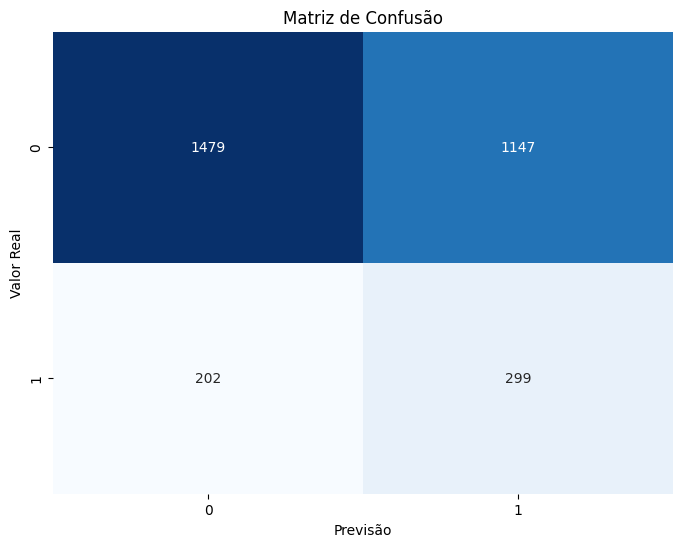

Report:
               precision    recall  f1-score   support

           0       0.88      0.56      0.69      2626
           1       0.21      0.60      0.31       501

    accuracy                           0.57      3127
   macro avg       0.54      0.58      0.50      3127
weighted avg       0.77      0.57      0.63      3127



In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

x = dataset[['DuracaoDoutorado',
             'Genero',
             'ExclusividadeDoutorado',
             'Publicacoes',
             'IdadeAcademica']]
y = dataset['HistoricoFiliacaoemIESInternacional']

# Dividindo o conjunto de dados para estimação do modelo e validação
# 30% dos dados serão para teste e 70% para treino
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# Balanceamento forçado das classes : grande desproporção de 0s e 1s em UltimaFiliacaoInter
print(y.value_counts())
model = LogisticRegression(class_weight='balanced')
model.fit(x_train, y_train)

# Fazendo predições
y_pred = model.predict(x_test)

# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# Gerando e plotando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Previsão")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusão")
plt.show()

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)
print("Report:\n", class_report)


## Estimando gênero

Estimar o gênero do pesquisador(a) com base nas seguintes variáveis disponíveis:
* DuracaoDoutorado
* ExclusividadeDoutorado
* Publicacoes
* IdadeAcademica
* HistoricoFiliacaoemIESInternacional

Genero
0.0    4014
1.0    3802
Name: count, dtype: int64
Acurácia: 0.5403638430926663


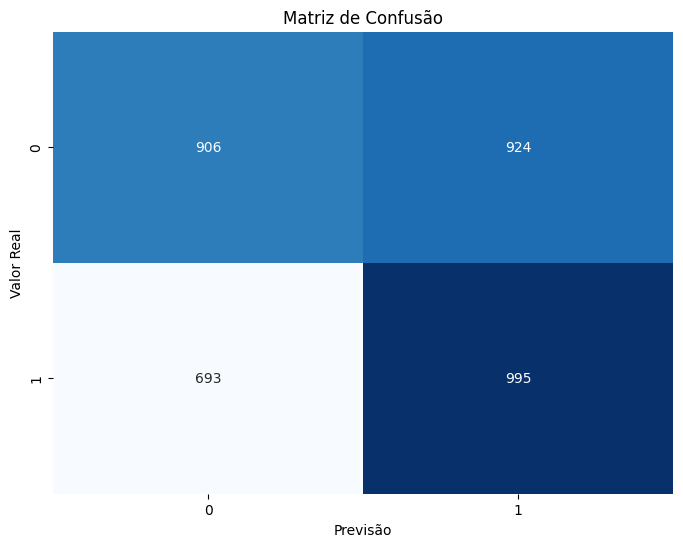

Report:
               precision    recall  f1-score   support

         0.0       0.57      0.50      0.53      1830
         1.0       0.52      0.59      0.55      1688

    accuracy                           0.54      3518
   macro avg       0.54      0.54      0.54      3518
weighted avg       0.54      0.54      0.54      3518



In [5]:
x = dataset[['DuracaoDoutorado',
             'ExclusividadeDoutorado',
             'Publicacoes',
             'IdadeAcademica',
             'HistoricoFiliacaoemIESInternacional']]
y = dataset['Genero']

# Dividindo o conjunto de dados para estimação do modelo e validação
# 30% dos dados serão para teste e 70% para treino
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.45, random_state=42)

print(y.value_counts())
model = LogisticRegression()
model.fit(x_train, y_train)

# Fazendo predições
y_pred = model.predict(x_test)

# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# Gerando e plotando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Previsão")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusão")
plt.show()

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)
print("Report:\n", class_report)

## Estimando exclusividade de área no doutorado

Estimar ExclusividadeDoutorado com base nas seguintes variáveis disponíveis:
* DuracaoDoutorado
* Genero
* Publicacoes
* IdadeAcademica
* HistoricoFiliacaoemIESInternacional

ExclusividadeDoutorado
1    4728
0    3088
Name: count, dtype: int64
Acurácia: 0.6173962478681069


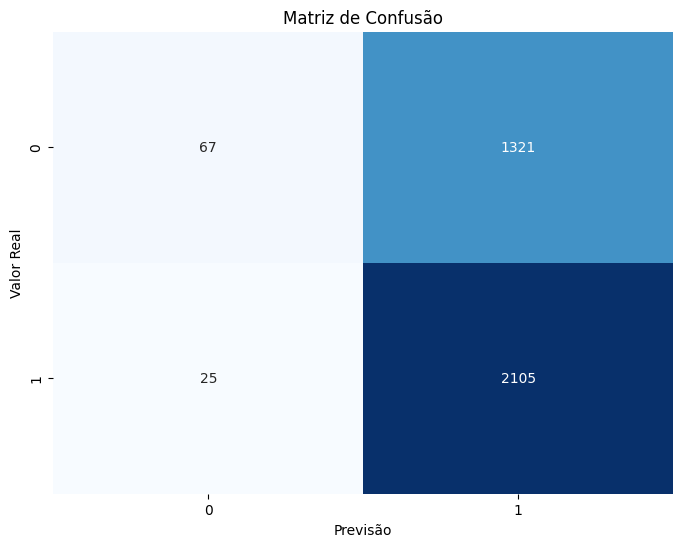

Report:
               precision    recall  f1-score   support

           0       0.73      0.05      0.09      1388
           1       0.61      0.99      0.76      2130

    accuracy                           0.62      3518
   macro avg       0.67      0.52      0.42      3518
weighted avg       0.66      0.62      0.49      3518



In [6]:
x = dataset[['DuracaoDoutorado',
             'Genero',
             'Publicacoes',
             'IdadeAcademica',
             'HistoricoFiliacaoemIESInternacional']]
y = dataset['ExclusividadeDoutorado']

# Dividindo o conjunto de dados para estimação do modelo e validação
# 30% dos dados serão para teste e 70% para treino
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.45, random_state=42)

print(y.value_counts())
model = LogisticRegression()
model.fit(x_train, y_train)

# Fazendo predições
y_pred = model.predict(x_test)

# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# Gerando e plotando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Previsão")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusão")
plt.show()

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)
print("Report:\n", class_report)